In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from Constants import EnRoadsConstants
from Carbon_Sys import *
from Climate_Sys import *


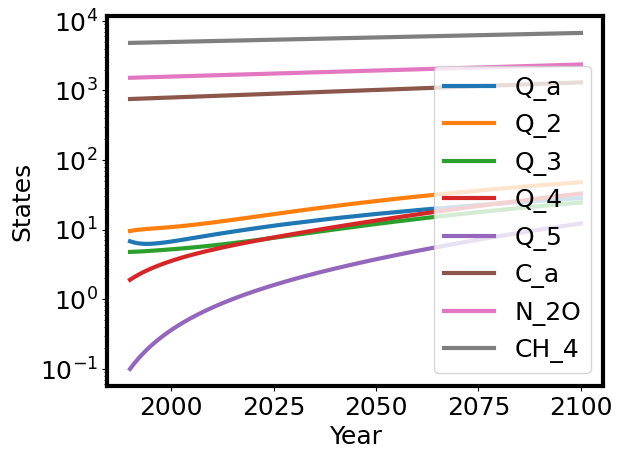

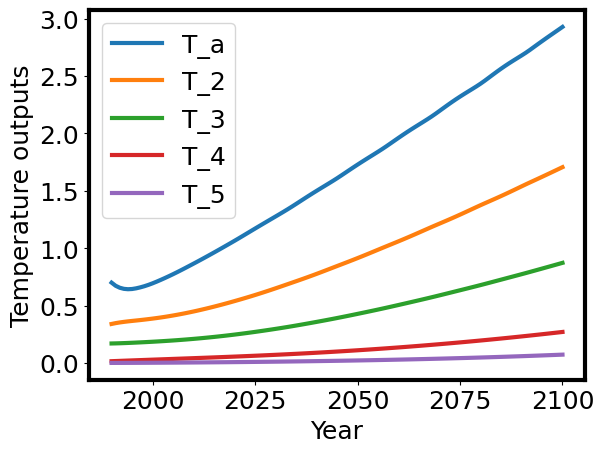

In [ ]:
# Define an ODE wrapper that returns only dx/dt for the ODE solver.
def ode_rhs(t, x, c):
    dxdt, _ = Climate_Sys(t, x, 0, c)
    return dxdt

# ---------------------------------------------------------------------------
def main():
    c = EnRoadsConstants()
    
    # Initial state vector:
    # - c.heat_initial is a 5-element array.
    # - The gas state values are computed by converting the initial masses.
    x0 = np.concatenate((
        c.heat_initial,
        np.array([c.C0 / c.ppm_co2_per_GtonC,
                  c.N0 / c.ppb_n2o_per_mton_n2o,
                  c.M0 / c.ppb_ch4_per_mton_ch4])
    ))
    
    # Time vector: from 1990 to 2100 (inclusive) with a step of 1 year.
    t_span = (1990, 2100)
    t_eval = np.arange(1990, 2100 + 1, 1)
    
    # Exogenous inputs (u) -- here a zero array (unused in ode_rhs)
    u = np.zeros(len(t_eval))
    
    # Solve the system of ODEs using solve_ivp (RK45 method)
    sol = solve_ivp(fun=lambda t, x: ode_rhs(t, x, c),
                    t_span=t_span, y0=x0, t_eval=t_eval, method='RK45')
    
    # Extract the state trajectories (each row corresponds to one state variable)
    states = sol.y  # shape: (8, number_of_time_points)
    
    # Compute the temperature outputs from the heat in each layer.
    # (Each temperature = Q / heat_capacity)
    temperatures = states[0:5, :] / c.heat_capacity[:, None]
    
    # -----------------------------------------------------------------------
    # Plotting
    # Set plotting parameters (similar to formatPlot in MATLAB)
    plt.rcParams.update({'font.size': 18, 'lines.linewidth': 3, 'axes.linewidth': 3})
    
    # Figure 1: Semilog plot of all state variables.
    plt.figure(1)
    plt.clf()
    state_labels = ['Q_a', 'Q_2', 'Q_3', 'Q_4', 'Q_5', 'C_a', 'N_2O', 'CH_4']
    for i in range(states.shape[0]):
        plt.semilogy(t_eval, states[i, :], label=state_labels[i])
    plt.xlabel('Year')
    plt.ylabel('States')
    plt.legend()
    
    # Figure 2: Plot of the temperature outputs.
    plt.figure(2)
    plt.clf()
    temp_labels = ['T_a', 'T_2', 'T_3', 'T_4', 'T_5']
    for i in range(temperatures.shape[0]):
        plt.plot(t_eval, temperatures[i, :], label=temp_labels[i])
    plt.xlabel('Year')
    plt.ylabel('Temperature outputs')
    plt.legend()
    
    plt.show()

# ---------------------------------------------------------------------------
if __name__ == '__main__':
    main()